In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
# plt.style.use("fivethirtyeight")
fontsize = 12

In [2]:
path = "/Users/bashirulazambiswas/Documents/Sadia/SUNY courses/2022_Spring/ICSI 536_Machine Learning/Project/Stock Price Prediction/My work/Data"
rpath = "/Users/bashirulazambiswas/Documents/Sadia/SUNY courses/2022_Spring/ICSI 536_Machine Learning/Project/Stock Price Prediction/My work/Data analysis/Results"

In [3]:
data = pd.read_csv(path+"/Netflix dataset.csv")
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')



In [4]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...
2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000


In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1009 entries, 2018-02-05 to 2022-02-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1009 non-null   float64
 1   High       1009 non-null   float64
 2   Low        1009 non-null   float64
 3   Close      1009 non-null   float64
 4   Adj Close  1009 non-null   float64
 5   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.2 KB


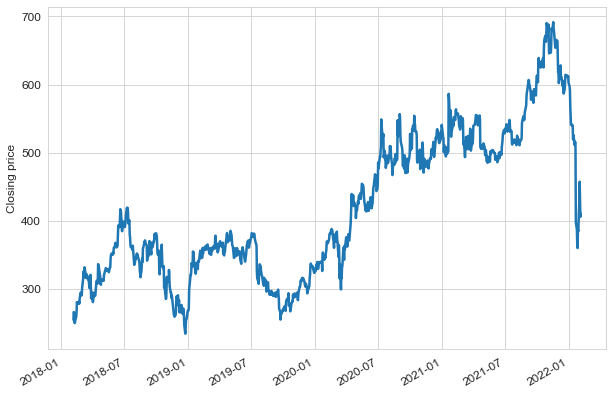

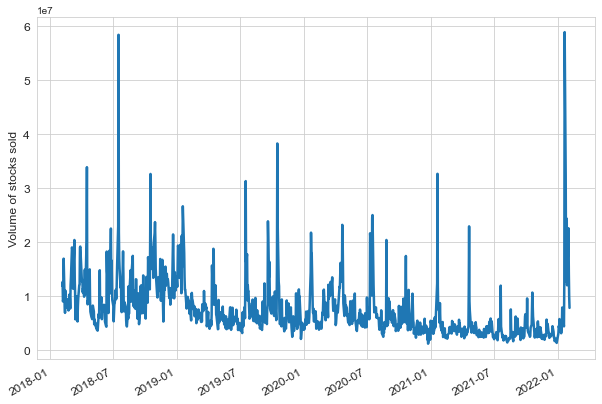

In [7]:
data['Adj Close'].plot(figsize = (10,7),linewidth=2.5)
ax = plt.ylabel('Closing price',fontsize=fontsize)
ax = plt.xticks(fontsize=fontsize)
ax = plt.yticks(fontsize=fontsize)
ax = plt.xlabel(None)
plt.savefig(rpath+"/Closing price.png")
plt.figure()
data['Volume'].plot(figsize = (10,7),fontsize=fontsize,linewidth=2.5)


ax = plt.ylabel('Volume of stocks sold',fontsize=fontsize)
ax = plt.xticks(fontsize=fontsize)
ax = plt.yticks(fontsize=fontsize)
ax = plt.xlabel(None)
plt.savefig(rpath+"/Volumes .png")


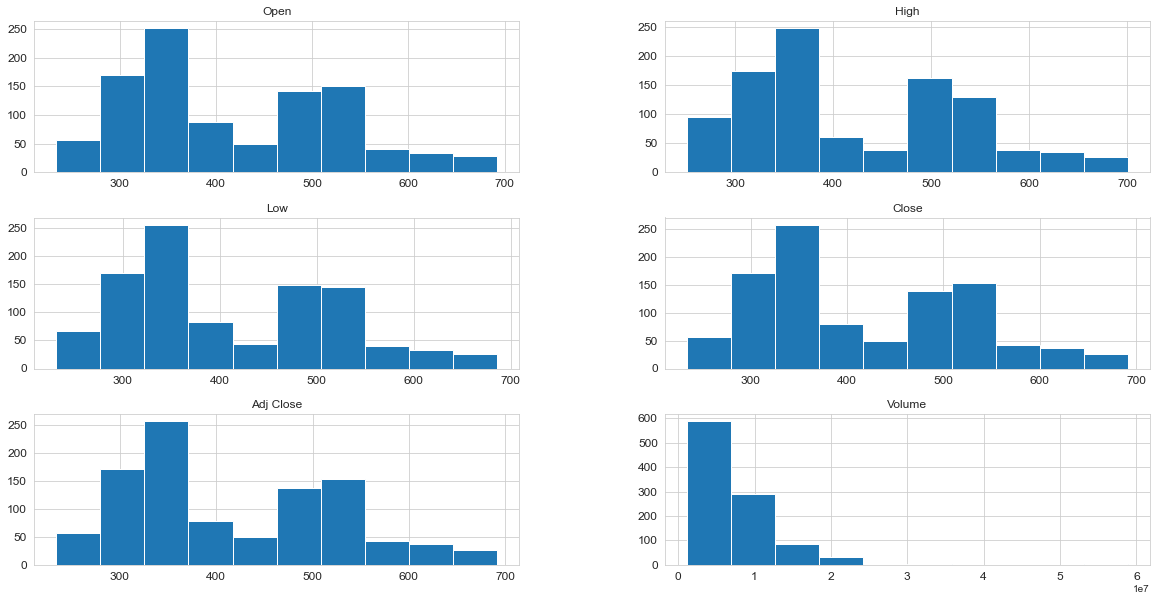

In [8]:
ax = data.hist(figsize=(20,10),xlabelsize=fontsize,ylabelsize=fontsize)
plt.savefig(rpath+"/Histogram.png")

In [9]:
# Moving average
ma_day = [10, 20, 50]
for ma in ma_day:
    data["MA for "+str(ma)+" days"] = data['Adj Close'].rolling(ma).mean()

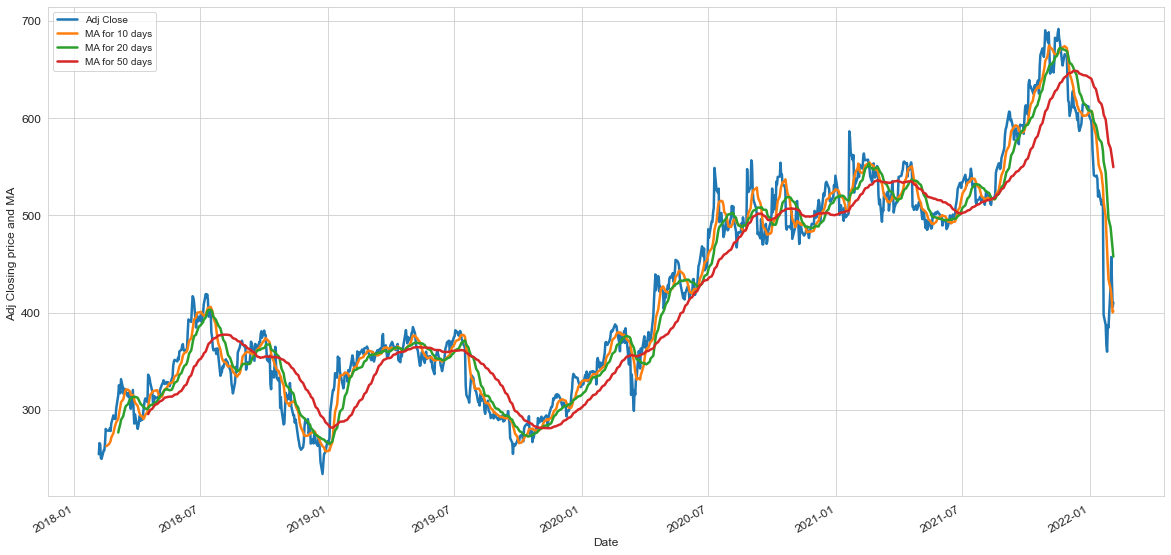

In [10]:
data[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(figsize=(20,10),linewidth=2.5)
ax = plt.ylabel("Adj Closing price and MA ",fontsize=fontsize)
ax = plt.xlabel("Date",fontsize=fontsize)
ax = plt.xticks(fontsize=fontsize)
ax = plt.yticks(fontsize=fontsize)
plt.savefig(rpath+"/Adj Closing price and the moving averages .png")

Analyzing the risk of the stock by taking a closer look at the daily changes of the stock

/Users/bashirulazambiswas/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


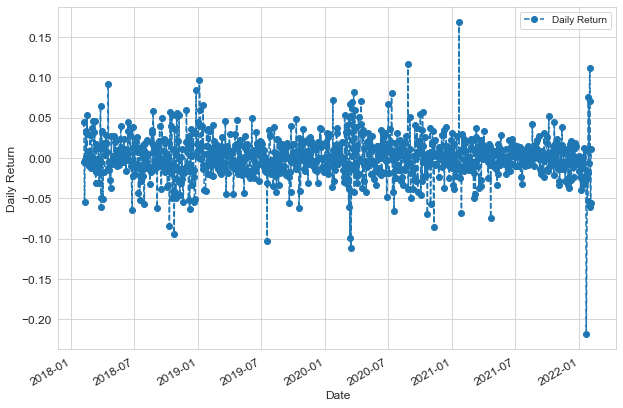

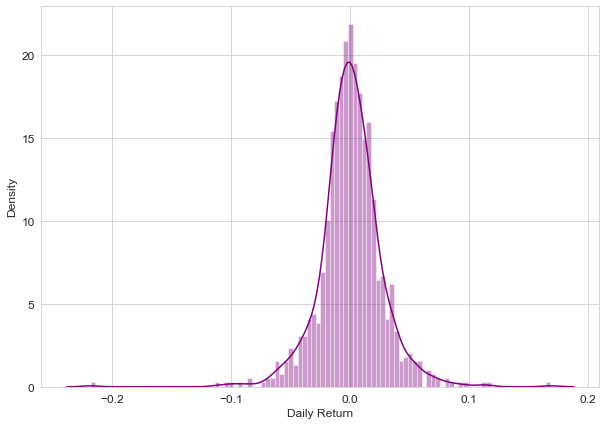

In [11]:
data['Daily Return'] = data['Adj Close'].pct_change()
data['Daily Return'].plot(legend=True, linestyle='--', marker='o',figsize = (10,7))
ax = plt.xticks(fontsize=fontsize)
ax = plt.yticks(fontsize=fontsize)
ax = plt.ylabel("Daily Return",fontsize=fontsize)
ax = plt.xlabel("Date",fontsize=fontsize)
plt.savefig(rpath+"/Daily return plot.png")

plt.figure(figsize=(10,7))
sns.distplot(data['Daily Return'].dropna(), bins=100, color='purple')
plt.ylabel('Density',fontsize=fontsize)
plt.xlabel('Daily Return',fontsize=fontsize)
ax = plt.xticks(fontsize=fontsize)
ax = plt.yticks(fontsize=fontsize)
plt.savefig(rpath+"/Daily return distplot.png")


